In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from spacepy import pycdf
import matplotlib.dates as mdates
from datetime import datetime, timezone

In [2]:
colors = [
    "#1f77b4",  # Blue
    "#ff7f0e",  # Orange
    "#2ca02c",  # Green
    "#d62728",  # Red
    "#9467bd",  # Purple
    "#8c564b",  # Brown
    "#e377c2",  # Pink
    "#7f7f7f",  # Gray
    "#bcbd22",  # Olive
    "#17becf",  # Cyan
    "#aec7e8",  # Light Blue
    "#ffbb78",  # Light Orange
]

colormap = ListedColormap(colors)

In [ ]:
def mag_field_time_plot(time_data_fgm, mag_field_data):
    _, ax = plt.subplots(figsize=(10, 6))

    ax.plot(time_data_fgm, mag_field_data[:, 0], label='Bx (GSM)', color='r')
    ax.plot(time_data_fgm, mag_field_data[:, 1], label='By (GSM)', color='g')
    ax.plot(time_data_fgm, mag_field_data[:, 2], label='Bz (GSM)', color='b')

    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('Magnetic Field (nT)')
    # ax.set_yscale('symlog', linthresh=10)
    ax.set_title('Magnetic Field Components vs Time')
    ax.grid()
    ax.legend()

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    # ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def gsm_coord_time_plot(time_data_state, gsm_coords):
    _, ax = plt.subplots(figsize=(10, 6))

    ax.plot(time_data_state, gsm_coords[:, 0], label='X (GSM)', color='r')
    ax.plot(time_data_state, gsm_coords[:, 1], label='Y (GSM)', color='g')
    ax.plot(time_data_state, gsm_coords[:, 2], label='Z (GSM)', color='b')

    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('Position (Km)')
    ax.set_title('GSM Coordinates vs Time')
    ax.grid()
    ax.legend()

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def fluxes_e_measured_plot(time_data_sst, flux_data):
    _, ax = plt.subplots(figsize=(10, 6))

    for i in range(0, 16):
        if not np.all(np.isnan(flux_data[:, i])):
            ax.plot(time_data_sst, flux_data[:, i], label=f'Channel {i + 1}', color=colormap(i))

    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('eV/(cm²·s·sr·eV) in log scale')
    ax.set_yscale('log')
    ax.grid()
    ax.set_title('Electron Fluxes Measured by Solid State Telescope (SST)')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def fluxes_i_measured_plot(time_data_sst, flux_data):
    _, ax = plt.subplots(figsize=(10, 6), dpi=100)

    for i in range(0, 16):
        if not np.all(np.isnan(flux_data[:, i])):
            ax.plot(time_data_sst, flux_data[:, i], label=f'Channel {i + 1}', color=colormap(i))

    ax.set_xlabel('Time (UTC)')
    ax.set_ylabel('eV/(cm²·s·sr·eV) in log scale')
    ax.set_yscale('log')
    ax.grid()
    ax.set_title('Ion Fluxes Measured by Solid State Telescope (SST)', fontsize=16)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [4]:
cdf_file_fgm_10 = pycdf.CDF('data/tha/assignment_1/tha_l2_fgm_20140610_v01.cdf')
cdf_file_sst_10 = pycdf.CDF('data/tha/assignment_1/tha_l2_sst_20140610_v01.cdf')
cdf_file_state_10 = pycdf.CDF('data/tha/assignment_1/tha_l1_state_20140610_v02.cdf')

cdf_file_fgm_11 = pycdf.CDF('data/tha/assignment_1/tha_l2_fgm_20140611_v01.cdf')
cdf_file_sst_11 = pycdf.CDF('data/tha/assignment_1/tha_l2_sst_20140611_v01.cdf')
cdf_file_state_11 = pycdf.CDF('data/tha/assignment_1/tha_l1_state_20140611_v02.cdf')

cdf_file_fgm_12 = pycdf.CDF('data/tha/assignment_1/tha_l2_fgm_20140612_v01.cdf')
cdf_file_sst_12 = pycdf.CDF('data/tha/assignment_1/tha_l2_sst_20140612_v01.cdf')
cdf_file_state_12 = pycdf.CDF('data/tha/assignment_1/tha_l1_state_20140612_v02.cdf')

In [7]:
print(cdf_file_fgm_10['tha_fgs_gsm'].attrs)

AVG_TYPE: standard [CDF_CHAR]
CALIB_INPUT: tha_fgmcal.txt [CDF_CHAR]
CALIB_SOFTWARE: fgm_calibrate, thm_cal_fgm, thm_cal_fit [CDF_CHAR]
CATDESC: FGS magnetic field B in XYZ GSM Coordinates [CDF_CHAR]
COORDINATE_SYSTEM: GSM>Geocentric Solar Magnetic [CDF_CHAR]
DEPEND_0: tha_fgs_epoch [CDF_CHAR]
DEPEND_1: tha_fgs_compno [CDF_CHAR]
DEPEND_EPOCH0: tha_fgs_epoch0 [CDF_CHAR]
DEPEND_TIME: tha_fgs_time [CDF_CHAR]
DICT_KEY: magnetic_field>vector_GSM [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: BXYZ GSM Coordinate, nT units [CDF_CHAR]
FILLVAL: -1e+30 [CDF_FLOAT]
FORMAT: E13.6 [CDF_CHAR]
LABL_PTR_1: tha_fgs_labl [CDF_CHAR]
PROPERTY: vector [CDF_CHAR]
REPRESENTATION_1: Rep_xyz [CDF_CHAR]
SCALE_TYP: linear [CDF_CHAR]
SC_ID: a [CDF_CHAR]
SI_CONVERSION: 1e-9>T [CDF_CHAR]
TENSOR_ORDER: 1 [CDF_CHAR]
UNITS: nT GSM [CDF_CHAR]
VALIDMAX: [25000. 25000. 25000.] [CDF_FLOAT]
VALIDMIN: [-25000. -25000. -25000.] [CDF_FLOAT]
VAR_NOTES: Units are in nanotesla [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]


In [8]:
mag_field_data = np.concatenate([cdf_file_fgm_10['tha_fgs_gsm'][:], cdf_file_fgm_11['tha_fgs_gsm'][:], cdf_file_fgm_12['tha_fgs_gsm'][:]], axis=0)
time_data_fgm = np.concatenate([cdf_file_fgm_10['tha_fgs_time'][:], cdf_file_fgm_11['tha_fgs_time'][:], cdf_file_fgm_12['tha_fgs_time'][:]], axis=0)

gsm_coords = np.concatenate([cdf_file_state_10['tha_pos_gsm'][:], cdf_file_state_11['tha_pos_gsm'][:], cdf_file_state_12['tha_pos_gsm'][:]], axis=0)
time_data_state = np.concatenate([cdf_file_state_10['tha_state_time'][:], cdf_file_state_11['tha_state_time'][:], cdf_file_state_12['tha_state_time'][:]], axis=0)

flux_e_data = np.concatenate([cdf_file_sst_10['tha_psef_en_eflux'][:], cdf_file_sst_11['tha_psef_en_eflux'][:], cdf_file_sst_12['tha_psef_en_eflux'][:]], axis=0)
time_e_data_sst = np.concatenate([cdf_file_sst_10['tha_psef_time'][:], cdf_file_sst_11['tha_psef_time'][:], cdf_file_sst_12['tha_psef_time'][:]], axis=0)

flux_i_data = np.concatenate([cdf_file_sst_10['tha_psif_en_eflux'][:], cdf_file_sst_11['tha_psif_en_eflux'][:], cdf_file_sst_12['tha_psif_en_eflux'][:]], axis=0)
time_i_data_sst = np.concatenate([cdf_file_sst_10['tha_psif_time'][:], cdf_file_sst_11['tha_psif_time'][:], cdf_file_sst_12['tha_psif_time'][:]], axis=0)

time_data_fgm = [datetime.fromtimestamp(t, tz=timezone.utc) for t in time_data_fgm]
time_data_state = [datetime.fromtimestamp(t, tz=timezone.utc) for t in time_data_state]
time_e_data_sst = [datetime.fromtimestamp(t, tz=timezone.utc) for t in time_e_data_sst]
time_i_data_sst = [datetime.fromtimestamp(t, tz=timezone.utc) for t in time_i_data_sst]

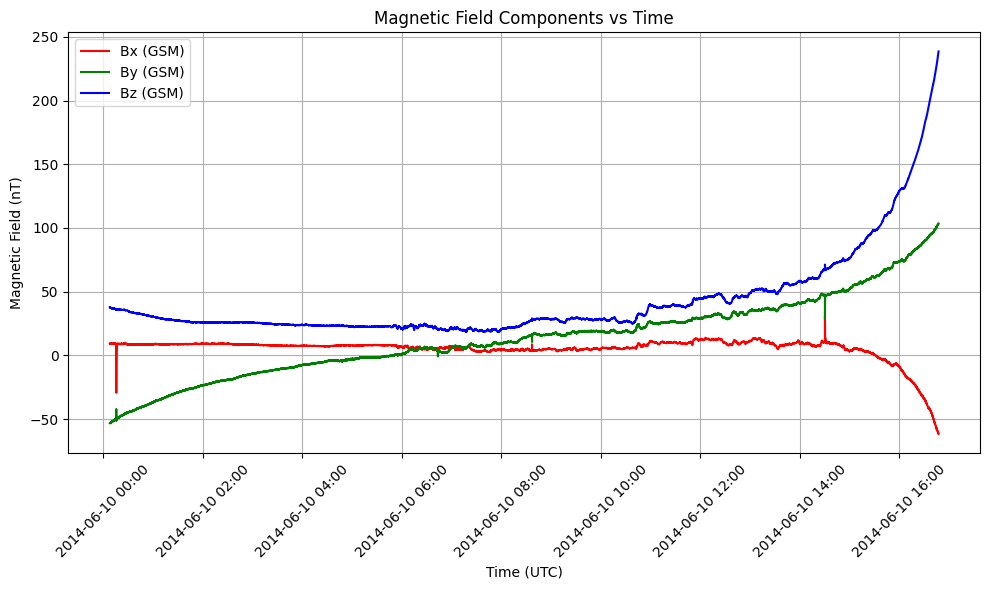

In [9]:
mag_field_time_plot([datetime.fromtimestamp(t, tz=timezone.utc) for t in cdf_file_fgm_10['tha_fgs_time'][:]][:20500], cdf_file_fgm_10['tha_fgs_gsm'][:][:20500])

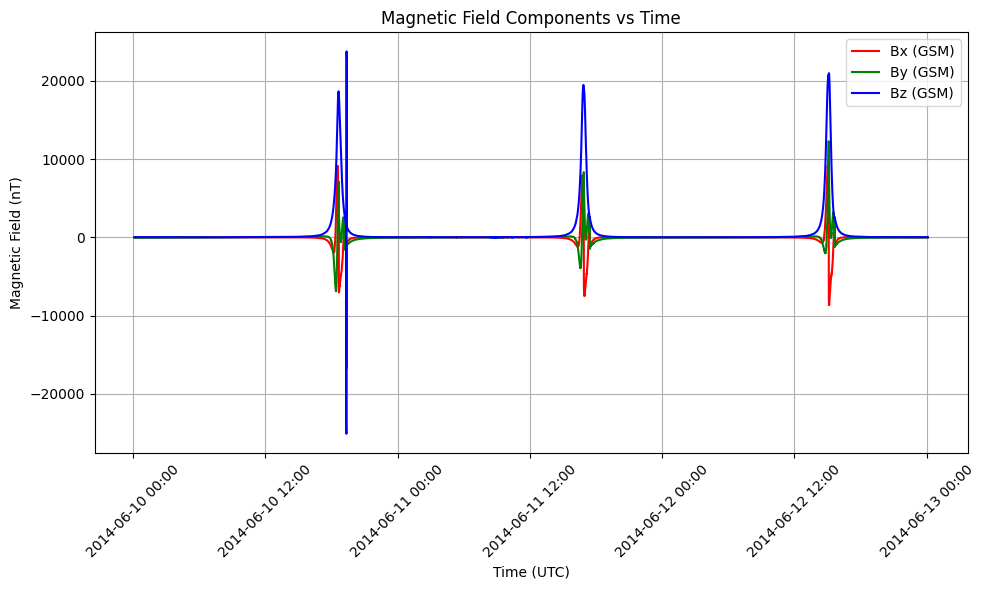

In [10]:
mag_field_time_plot(time_data_fgm, mag_field_data)

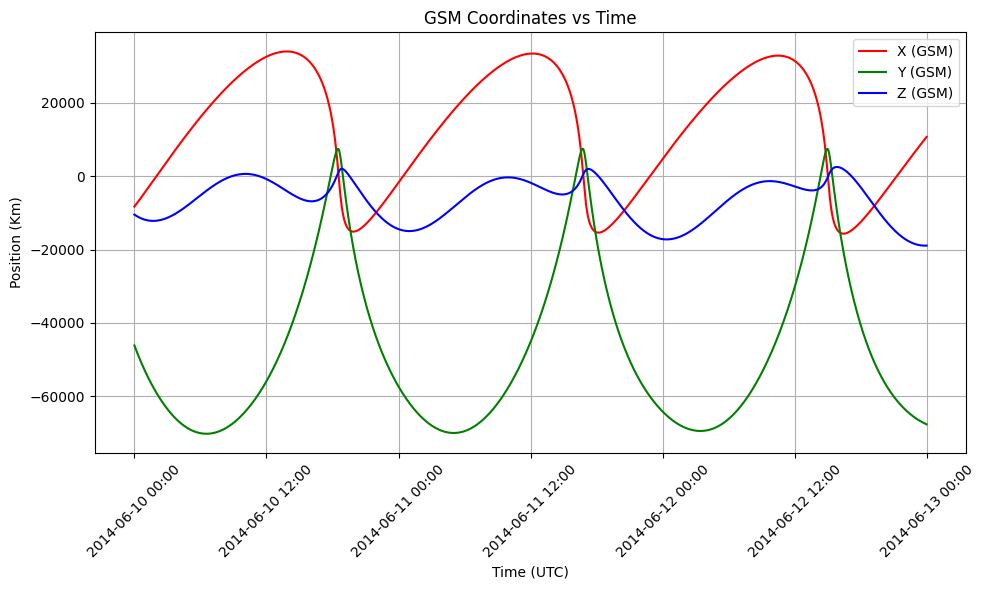

In [11]:
gsm_coord_time_plot(time_data_state, gsm_coords)

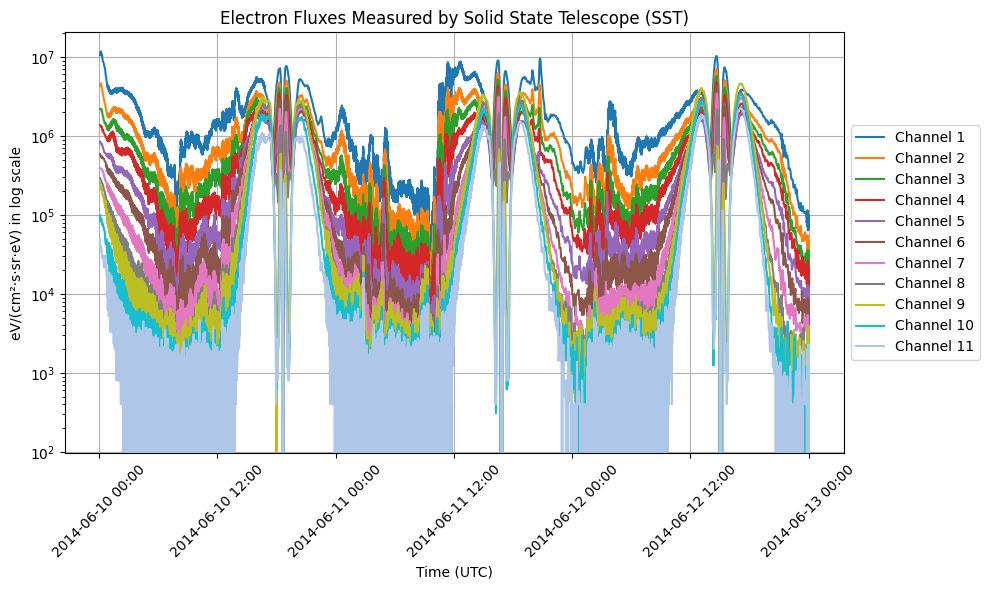

In [12]:
fluxes_e_measured_plot(time_e_data_sst, flux_e_data)

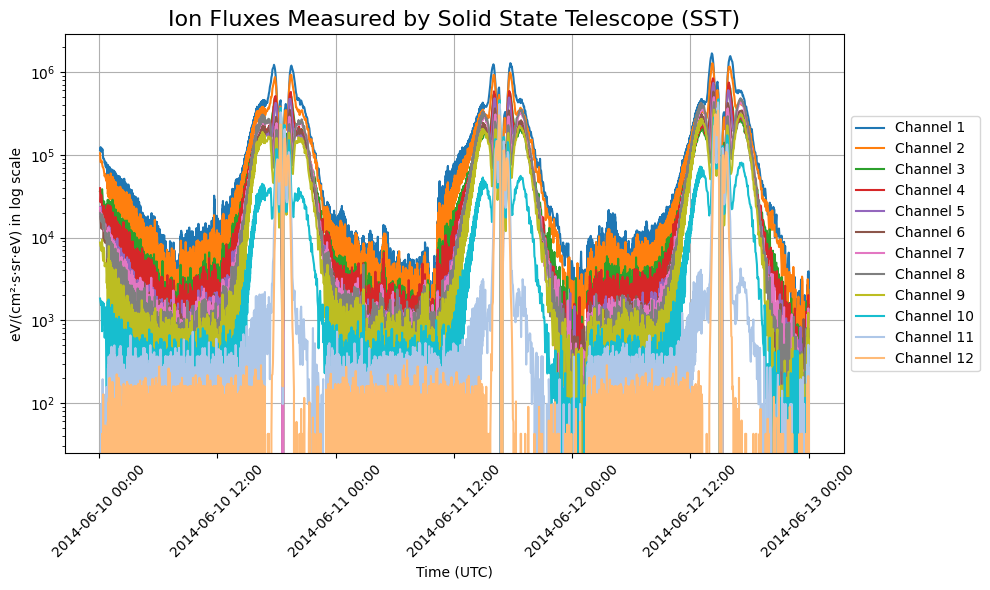

In [18]:
fluxes_i_measured_plot(time_i_data_sst, flux_i_data)